<a href="https://colab.research.google.com/github/1900690/yolo11-syakuyaku-app/blob/main/syakuyaku-detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#シャクヤク開花判定AI
※実行にはグーグルアカウントへのログインが必要です。

In [ ]:
#@title 事前準備
#@markdown ※実行に2分ほどかかります。
!pip -q install ultralytics
!wget -q  https://github.com/1900690/yolo11-syakuyaku-app/releases/download/obj-best/all-best-obj-model.pt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00


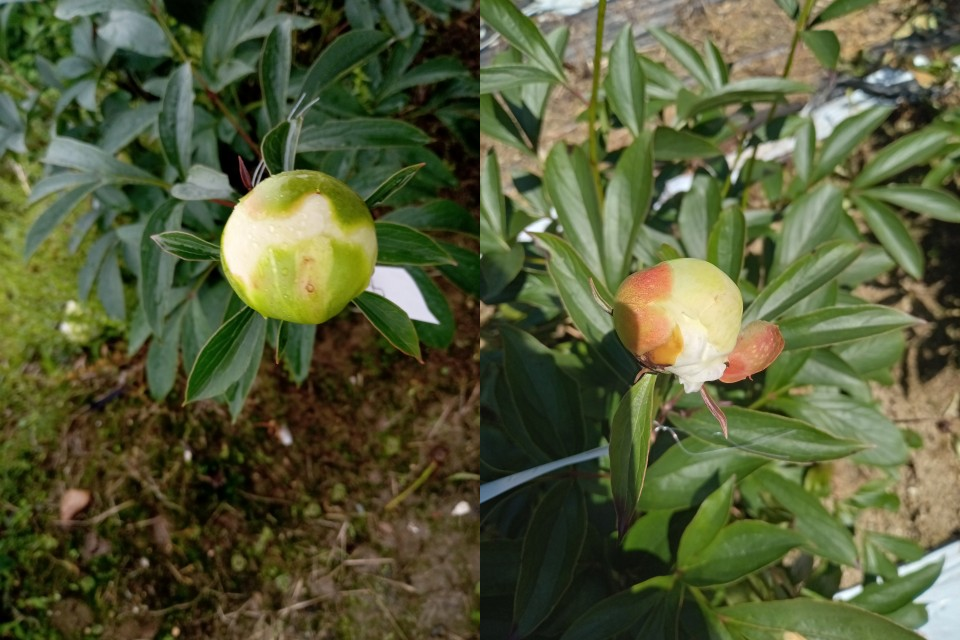

In [ ]:
#@title 分析する画像をアップロードまたはサンプル画像で分析
#@markdown ※複数アップロードした場合は最後の1枚のみ表示されます
from google.colab import files
import os
import shutil
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


サンプル画像を使用する = True # @param {type:"boolean"}

if os.path.exists('/content/test/'):
     shutil.rmtree('/content/test/')
if not os.path.exists('/content/test/'):
     os.makedirs('/content/test/')
%cd -q '/content/test/'
if サンプル画像を使用する == True:
  !wget -q -P /content/test/ https://github.com/1900690/yolo11-syakuyaku-app/releases/download/img/NG.jpg
  !wget -q -P /content/test/ https://github.com/1900690/yolo11-syakuyaku-app/releases/download/img/OK.jpg
  imok= cv2.imread('/content/test/OK.jpg')
  imng= cv2.imread('/content/test/NG.jpg')
  mergeim = np.hstack((imok,imng))
  cv2_imshow(mergeim)
else:
  uploaded_file = files.upload()
  uploaded_file_name_count = next(iter(uploaded_file))
  cv2_imshow(cv2.imread('/content/test/'+uploaded_file_name_count))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs

image 1/2 /content/test/NG.jpg: 640x480 1 NG, 2459.7ms
image 2/2 /content/test/OK.jpg: 640x480 1 OK, 2341.6ms
Speed: 3.0ms preprocess, 2400.7ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


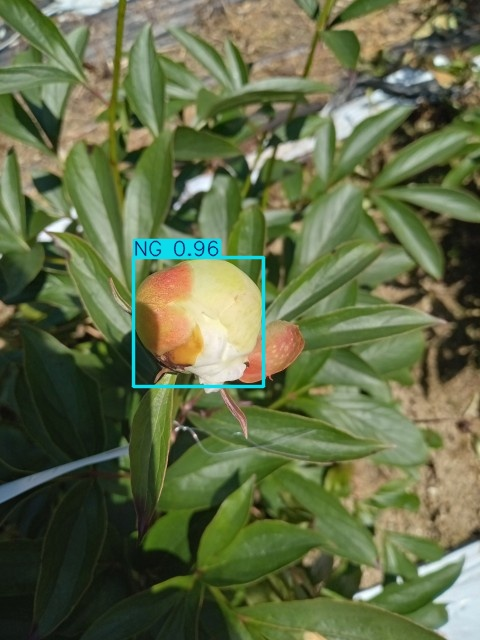

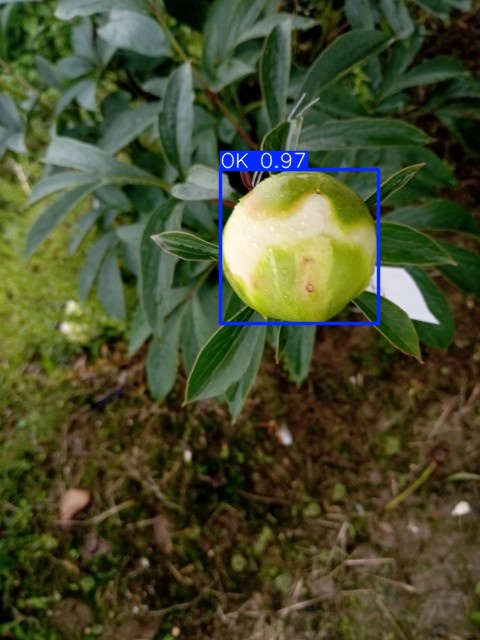

In [ ]:
#@title 分析して画像を表示
%cd -q '/content/'

import ultralytics
import shutil
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow


if os.path.exists('/content/runs/detect/predict'):
    shutil.rmtree('/content/runs/detect/predict')
!yolo predict model=/content/all-best-obj-model.pt source='/content/test/'

folder_path = '/content/runs/detect/predict'
files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for filname in files:
  img = cv2.imread(filname)
  cv2_imshow(img)